#**ENERGY CONSUMPTION USING LSTM**

In [ ]:
import pandas as pd

def sort_energy_data(file_path, output_path):

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert datetime column to pandas datetime
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    # Sort by datetime
    df_sorted = df.sort_values('Datetime')

    # Optionally set datetime as index
    df_sorted = df_sorted.set_index('Datetime')

    # Save the sorted DataFrame back to a CSV file
    df_sorted.to_csv(output_path)

    return df_sorted


In [ ]:
sorted_data = sort_energy_data("NI_hourly.csv", "sorted_energy_data.csv")

In [ ]:
df = pd.read_csv("sorted_energy_data.csv")
df.head(20)

,Datetime,NI_MW
0,2004-05-01 01:00:00,9198.0
1,2004-05-01 02:00:00,8570.0
2,2004-05-01 03:00:00,8183.0
3,2004-05-01 04:00:00,7917.0
4,2004-05-01 05:00:00,7828.0
5,2004-05-01 06:00:00,7806.0
6,2004-05-01 07:00:00,8082.0
7,2004-05-01 08:00:00,8267.0
8,2004-05-01 09:00:00,8830.0
9,2004-05-01 10:00:00,9381.0


##**Exploratory Data Analysis (EDA)**

EDA involves visualizing the data and identifying trends, seasonality, outliers, and missing values. Techniques such as line plots, scatter plots, autocorrelation plots, and decomposition can help uncover valuable insights and guide further analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
# Load the dataset
data = pd.read_csv('sorted_energy_data.csv', parse_dates=['Datetime'], index_col='Datetime')
# Sort data by datetime
data = data.sort_index()
data.head(10)

,NI_MW
Datetime,
2004-05-01 01:00:00,9198.0
2004-05-01 02:00:00,8570.0
2004-05-01 03:00:00,8183.0
2004-05-01 04:00:00,7917.0
2004-05-01 05:00:00,7828.0
2004-05-01 06:00:00,7806.0
2004-05-01 07:00:00,8082.0
2004-05-01 08:00:00,8267.0
2004-05-01 09:00:00,8830.0


In [ ]:
missing_values = data.isnull().sum()
print("Missing values count per column:\n", missing_values)

# Display basic info
print(data.info())
print(data.describe())

Missing values count per column:
 NI_MW    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58450 entries, 2004-05-01 01:00:00 to 2011-01-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NI_MW   58450 non-null  float64
dtypes: float64(1)
memory usage: 913.3 KB
None
              NI_MW
count  58450.000000
mean   11701.682943
std     2371.498701
min     7003.000000
25%     9954.000000
50%    11521.000000
75%    12896.750000
max    23631.000000


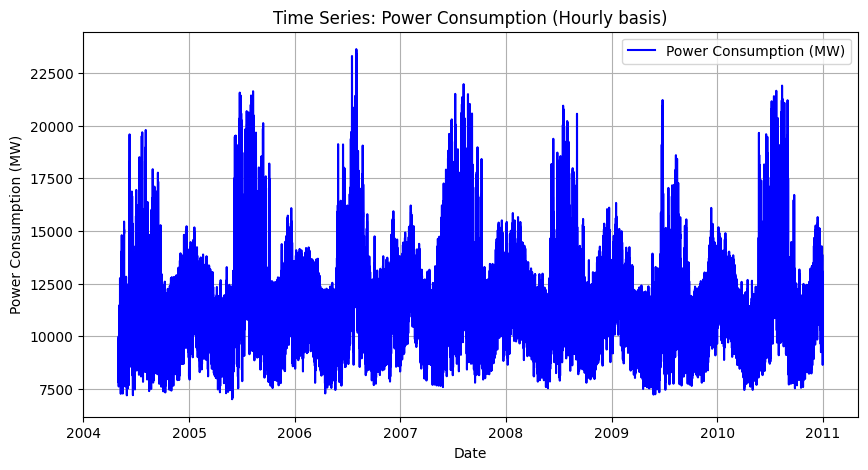

In [ ]:

# Plot the raw data
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['NI_MW'], label='Power Consumption (MW)', color='blue')
plt.title('Time Series: Power Consumption (Hourly basis)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()

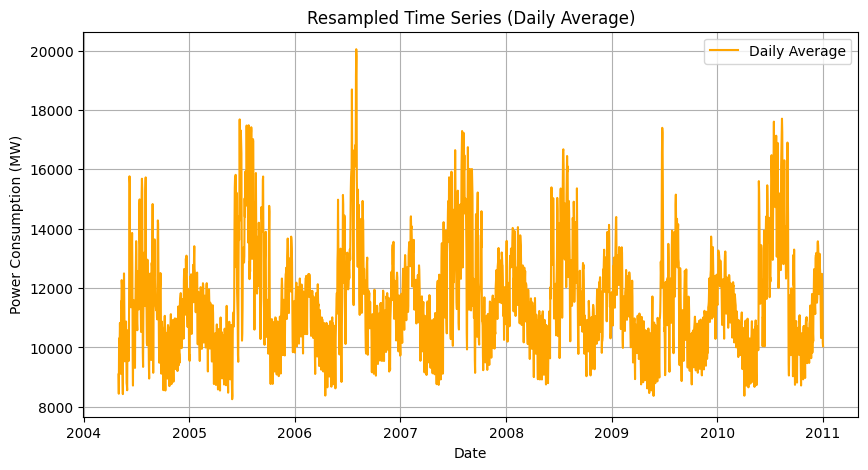

In [ ]:
# Resample data (daily average for clarity in long-term trends)
daily_data = data['NI_MW'].resample('D').mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data, label='Daily Average', color='orange')
plt.title('Resampled Time Series (Daily Average)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-25-8790400e8f02>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_data = data['NI_MW'].resample('M').mean()


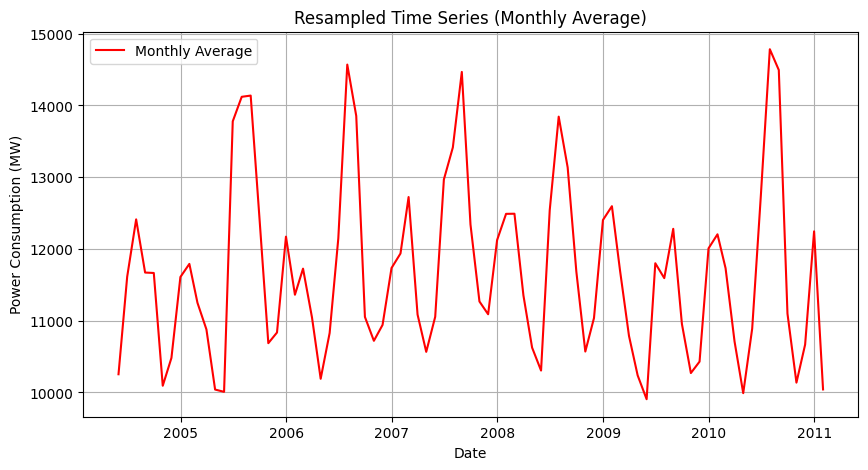

In [ ]:
# Resample data (daily average for clarity in long-term trends)
daily_data = data['NI_MW'].resample('M').mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data, label='Monthly Average', color='red')
plt.title('Resampled Time Series (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Power Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-37-0fb97656a4ed>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Datetime': pd.date_range(start='2004-01-01', periods=100, freq='H'),


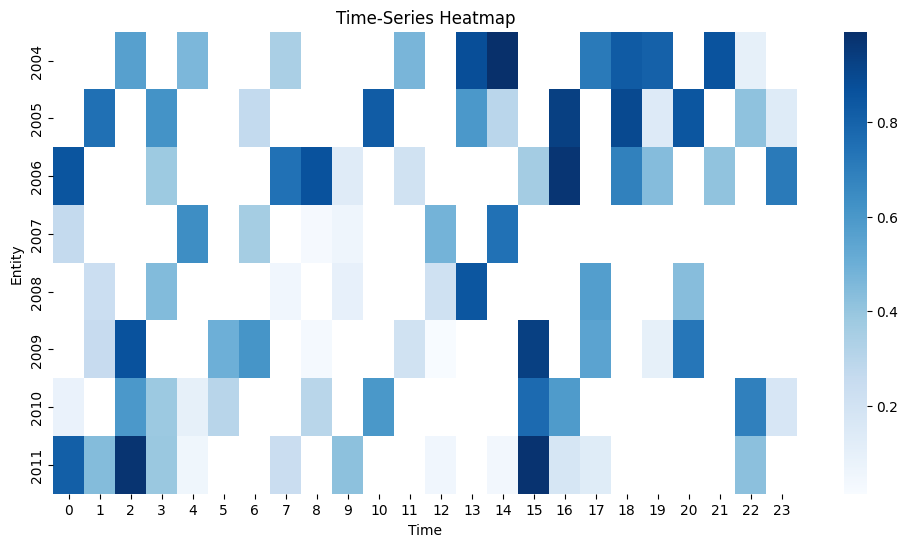

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'Entity' represents categories (like IDs) and 'Datetime' is the timestamp.
data = pd.DataFrame({
    'Entity': np.random.choice(range(2004, 2012), size=100),
    'Datetime': pd.date_range(start='2004-01-01', periods=100, freq='H'),
    'Value': np.random.rand(100)
})

# Pivot the data for the heatmap
data['Date'] = data['Datetime'].dt.date  # Extract date
data['Time'] = data['Datetime'].dt.hour  # Extract hour
heatmap_data = data.pivot_table(index='Entity', columns='Time', values='Value', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', cbar=True)

# Customize the plot
plt.title('Time-Series Heatmap')
plt.xlabel('Time')
plt.ylabel('Entity')
plt.show()


The color gradient (lighter to darker) reflects the value associated with the average Value for each year-hour combination.


<ipython-input-43-1ead9030db27>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Datetime': pd.date_range(start='2004-01-01', periods=100, freq='M'),  # Monthly data


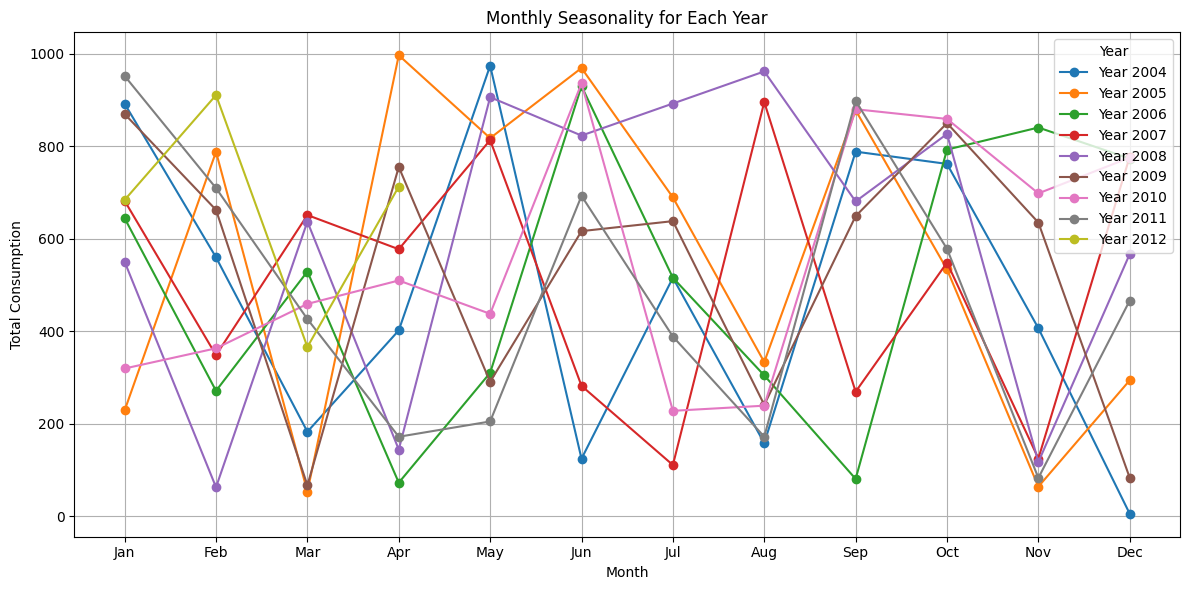

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'Entity': np.random.choice(range(2004, 2012), size=100),
    'Datetime': pd.date_range(start='2004-01-01', periods=100, freq='M'),  # Monthly data
    'Value': np.random.rand(100) * 1000  # Simulated consumption data
})

# Ensure 'Datetime' is a pandas datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extract year and month from the datetime
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month

# Monthly aggregation
monthly_data = data.groupby(['Year', 'Month'])['Value'].sum().unstack(level=0)

# Plot the monthly seasonality for each year
plt.figure(figsize=(12, 6))

# Plot lines for each year with different colors
for year in monthly_data.columns:
    plt.plot(monthly_data.index, monthly_data[year], label=f'Year {year}', marker='o')

# Customize the plot
plt.title('Monthly Seasonality for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


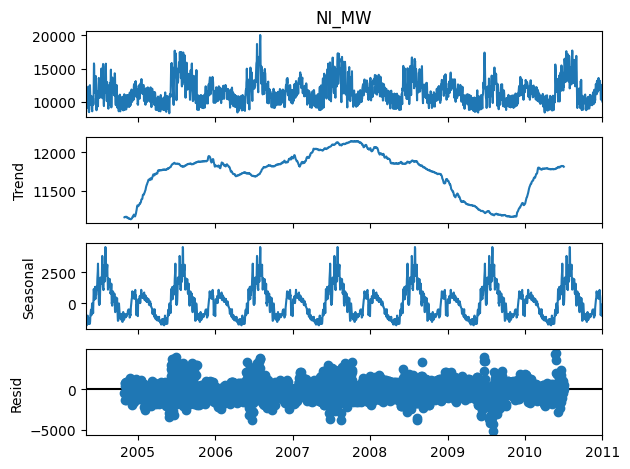

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Resample data (if needed) - example using daily averages (replace 'PJME_MW' with your target column)
daily_data = data['NI_MW'].resample('D').mean()

# 1. Decomposition to understand trends and seasonality
decomposition = seasonal_decompose(daily_data.dropna(), model='additive', period=365)  # period=365 for yearly seasonality
decomposition.plot()
plt.show()


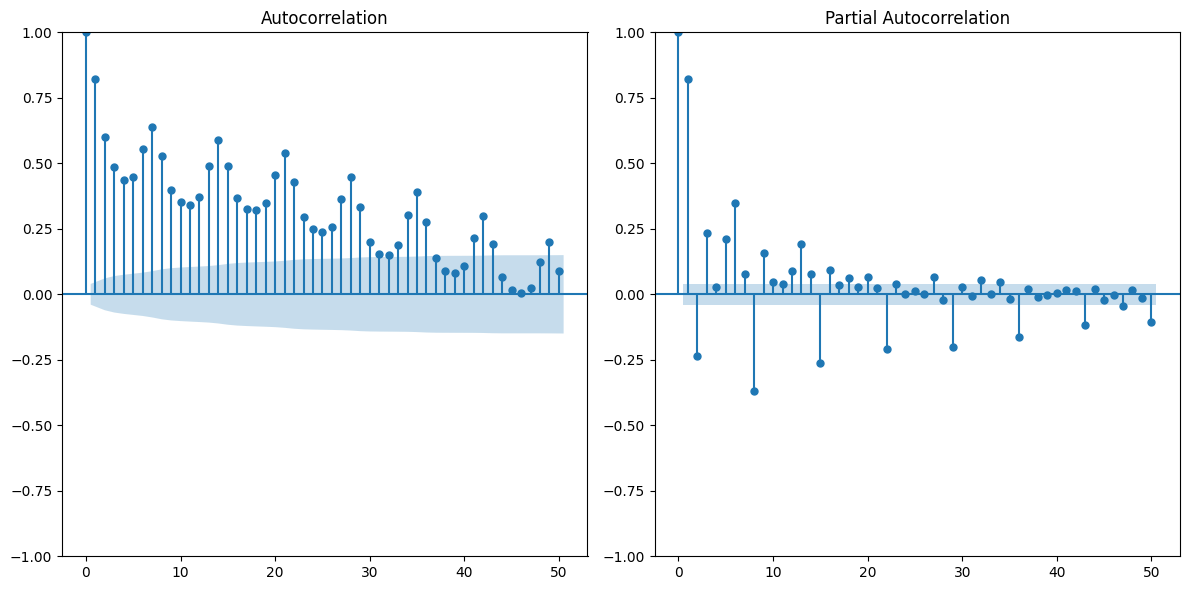

In [ ]:

# 2. Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(daily_data.dropna(), ax=plt.gca(), lags=50, title='Autocorrelation')
plt.subplot(122)
plot_pacf(daily_data.dropna(), ax=plt.gca(), lags=50, title='Partial Autocorrelation')
plt.tight_layout()
plt.show()



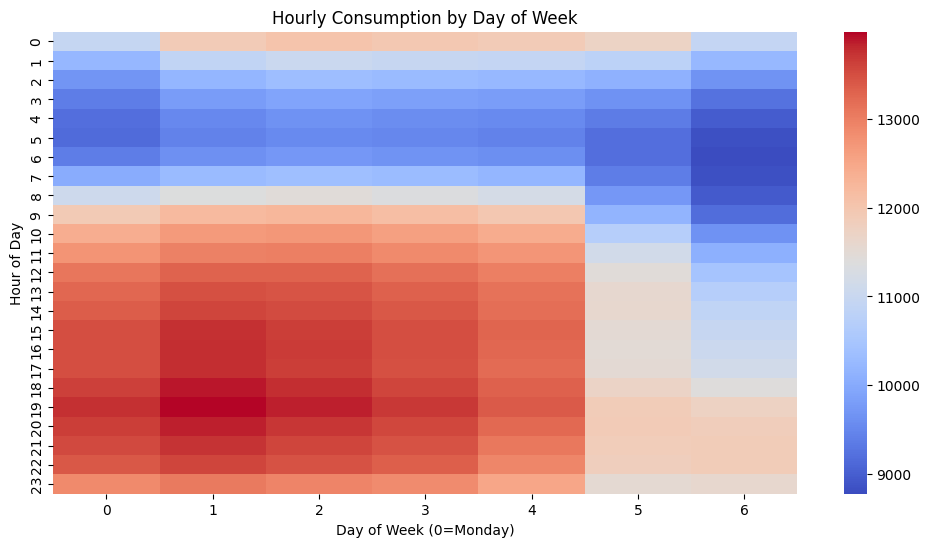

In [ ]:

# 3. Heatmap for seasonality detection (hourly, daily, or monthly trends)
# Extract relevant time components from the datetime index
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

# Pivot the data to show average consumption by hour and day of the week
pivot_table = data.pivot_table(index='hour', columns='day_of_week', values='NI_MW', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Hourly Consumption by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Hour of Day')
plt.show()

##Splitting the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('sorted_energy_data.csv', parse_dates=['Datetime'], index_col='Datetime')
data = data.sort_index()  # Ensure the data is sorted by datetime
print(data.head(10))  # Display first 10 rows to check data
df = data
# Define the forecast horizon (1 year)
test_period = 365 * 24  # Assuming hourly data, adjust if different frequency

# Split data into training and testing sets
train_data = data.iloc[:-test_period]
test_data = data.iloc[-test_period:]
# Print first and last rows of train and test data
print("First row of Train Data:")
print(train_data.iloc[0])
print("\nLast row of Train Data:")
print(train_data.iloc[-1])

print("\nFirst row of Test Data:")
print(test_data.iloc[0])
print("\nLast row of Test Data:")
print(test_data.iloc[-1])
print(train_data.shape)
print(test_data.shape)

                      NI_MW
Datetime                   
2004-05-01 01:00:00  9198.0
2004-05-01 02:00:00  8570.0
2004-05-01 03:00:00  8183.0
2004-05-01 04:00:00  7917.0
2004-05-01 05:00:00  7828.0
2004-05-01 06:00:00  7806.0
2004-05-01 07:00:00  8082.0
2004-05-01 08:00:00  8267.0
2004-05-01 09:00:00  8830.0
2004-05-01 10:00:00  9381.0
First row of Train Data:
NI_MW    9198.0
Name: 2004-05-01 01:00:00, dtype: float64

Last row of Train Data:
NI_MW    13067.0
Name: 2009-12-31 21:00:00, dtype: float64

First row of Test Data:
NI_MW    12735.0
Name: 2009-12-31 22:00:00, dtype: float64

Last row of Test Data:
NI_MW    10042.0
Name: 2011-01-01 00:00:00, dtype: float64
(49690, 1)
(8760, 1)


In [3]:
import numpy as np
import pandas as pd
import sklearn.preprocessing

# Normalize Data (Min-Max Scaling)
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['NI_MW'] = scaler.fit_transform(df['NI_MW'].values.reshape(-1, 1))
    return df, scaler

df_norm, scaler = normalize_data(df)  # Normalize the dataset

# Function to create sequences for LSTM
def load_data(stock, seq_len):
    X_data = []
    y_data = []
    for i in range(seq_len, len(stock)):
        X_data.append(stock.iloc[i-seq_len:i, 0].values)  # Creating sequences for X
        y_data.append(stock.iloc[i, 0])  # Corresponding y values

    # Convert lists to numpy arrays
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return X_data, y_data

# Calculate the index for the 80% split
train_size = int(len(df_norm) * 0.8)
test_size = len(df_norm) - train_size

# Split the data into training and test sets (80% training, 20% testing)
train_data = df_norm.iloc[:train_size]
test_data = df_norm.iloc[train_size:]

# Create sequences for training and testing
seq_len = 20  # Sequence length for the LSTM
X_train, y_train = load_data(train_data, seq_len)
X_test, y_test = load_data(test_data, seq_len)

# Reshape data to be used by LSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)


X_train.shape =  (46740, 20, 1)
y_train.shape =  (46740,)
X_test.shape =  (11670, 20, 1)
y_test.shape =  (11670,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Build the LSTM model
lstm_model = Sequential()

# LSTM layers
lstm_model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, activation='tanh', return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, activation='tanh', return_sequences=False))
lstm_model.add(Dropout(0.2))

# Output layer
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), shuffle=False)


Epoch 1/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0138 - val_loss: 0.0017
Epoch 2/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0021 - val_loss: 8.8204e-04
Epoch 3/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0012 - val_loss: 4.2174e-04
Epoch 4/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 8.1616e-04 - val_loss: 2.4415e-04
Epoch 5/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 6.1154e-04 - val_loss: 2.3904e-04
Epoch 6/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.4285e-04 - val_loss: 2.0330e-04
Epoch 7/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 4.9453e-04 - val_loss: 2.0946e-04
Epoch 8/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.5783e-04 - val_loss: 2.2443e-04
Epoch 9/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.3379e-04 - val_loss: 2.3079e-04
Epoch 10/10
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.2930e-04 - val_loss: 1.7118e-04


with 50 epochs

In [ ]:
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), shuffle=False)


Epoch 1/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0119 - val_loss: 0.0016
Epoch 2/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0021 - val_loss: 6.5300e-04
Epoch 3/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0011 - val_loss: 4.5604e-04
Epoch 4/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 7.9536e-04 - val_loss: 2.2072e-04
Epoch 5/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.0184e-04 - val_loss: 2.0163e-04
Epoch 6/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 5.4047e-04 - val_loss: 2.3367e-04
Epoch 7/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.7672e-04 - val_loss: 1.8266e-04
Epoch 8/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.6391e-04 - val_loss: 2.0519e-04
Epoch 9/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.2455e-04 - val_loss: 2.1200e-04
Epoch 10/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.1880e-04 - val_loss: 1.9949e-04
Epoch 11/50
731/731 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 

In [ ]:
# Evaluate the model on training and testing data
train_score = lstm_model.evaluate(X_train, y_train, verbose=0)
test_score = lstm_model.evaluate(X_test, y_test, verbose=0)

# Print MSE for both train and test sets
print(f'Train MSE: {train_score}, Test MSE: {test_score}')

# Make predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse scale predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
print(f'RMSE: {rmse}')


Train MSE: 0.00013200216926634312, Test MSE: 0.0001305607584072277
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE: 189.99680770909146


365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


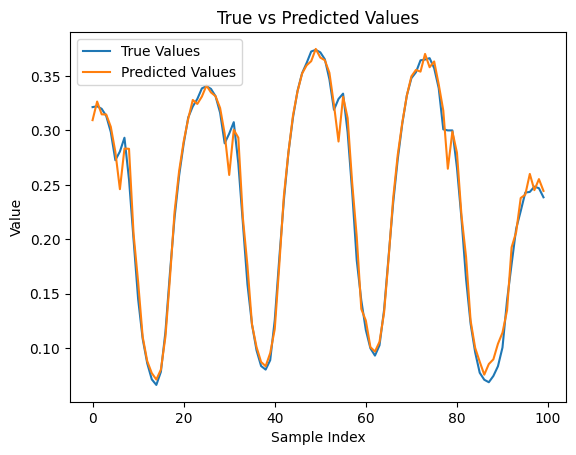

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred is the predictions made by the model
y_pred = lstm_model.predict(X_test)

# Plot predictions vs true values for the test set
plt.plot(y_test[:100], label='True Values')
plt.plot(y_pred[:100], label='Predicted Values')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


with 50 epochs


365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


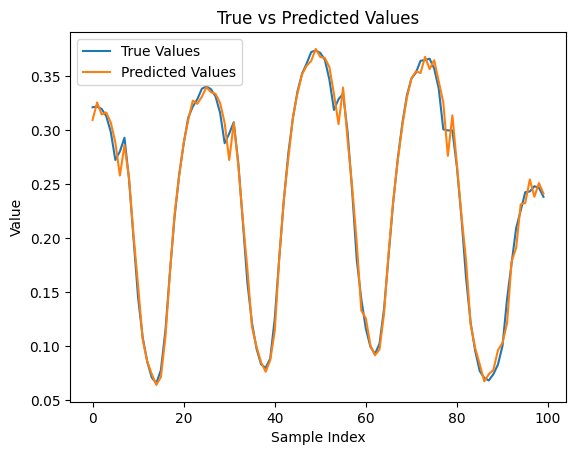

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred is the predictions made by the model
y_pred = lstm_model.predict(X_test)

# Plot predictions vs true values for the test set
plt.plot(y_test[:100], label='True Values')
plt.plot(y_pred[:100], label='Predicted Values')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()


With 50 EPOCHS

<ipython-input-13-dab1f86db07e>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2010-01-01', periods=len(y_test), freq='H')  # Example hourly timestamps


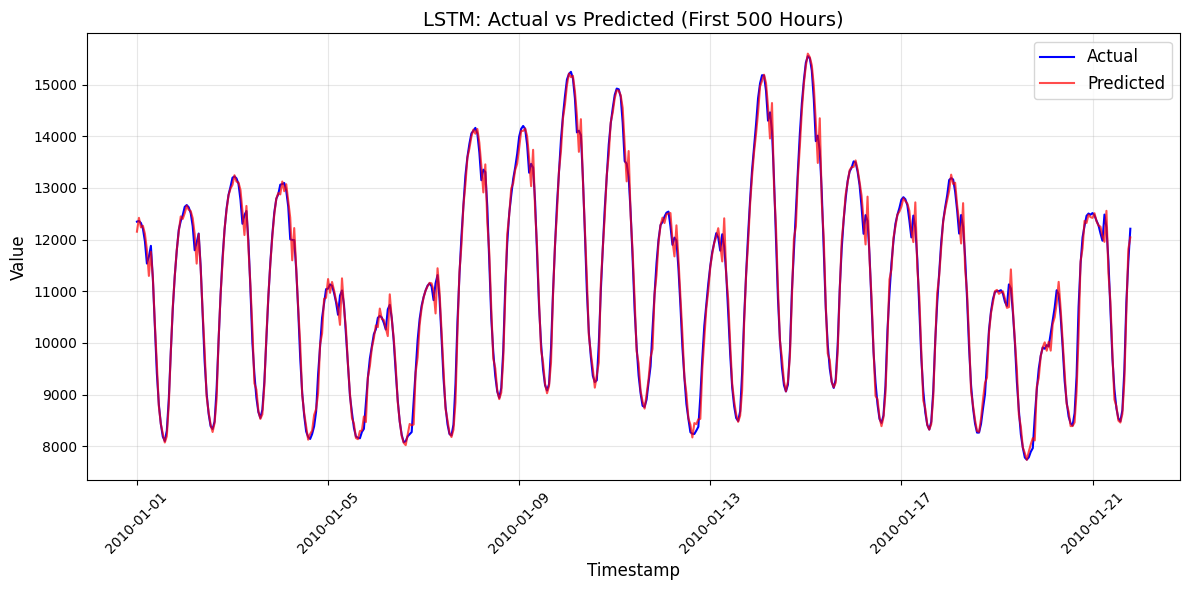

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample timestamps for the x-axis (adjust based on your actual data)
timestamps = pd.date_range(start='2010-01-01', periods=len(y_test), freq='H')  # Example hourly timestamps

# If y_test and y_pred have different scales, rescale them to the original scale using the scaler
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Plot the first 500 points for visualization
plt.figure(figsize=(12, 6))
plt.plot(timestamps[:500], y_test_rescaled[:500], label='Actual', color='blue')
plt.plot(timestamps[:500], y_pred_rescaled[:500], label='Predicted', color='red', alpha=0.7)

# Customize the graph
plt.title("LSTM: Actual vs Predicted (First 500 Hours)", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


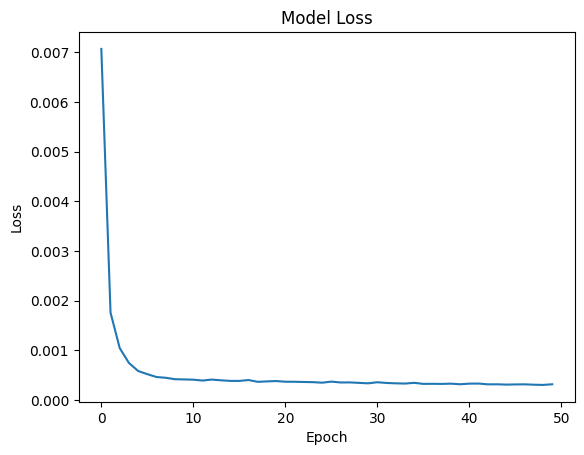

In [ ]:
import matplotlib.pyplot as plt
import math

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()



In [ ]:
# Save the model
lstm_model.save('my_lstm_model-50.h5')


In [4]:

from tensorflow.keras.models import load_model

# Load the trained LSTM model
model = load_model('/content/my_lstm_model-50.h5')

# Predict using the model
y_pred = model.predict(X_test)

y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()


365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


In [11]:
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the performance metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
smape = 100 * np.mean(2 * np.abs(y_pred_rescaled - y_test_rescaled) / (np.abs(y_test_rescaled) + np.abs(y_pred_rescaled)))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the results
print(f"LSTM: RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, sMAPE: {smape:.2f}%, R²: {r2:.2f}")


LSTM: RMSE: 190.00, MAE: 133.97, MAPE: 1.15%, sMAPE: 1.15%, R²: 0.99


In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(r2)

0.9935301906932396
